#        -----------------  BigMart Sales Prediction   ----------------------

In [26]:
!pip install featuretools==1.7.0
!pip install joblib==1.0.1
!pip install matplotlib==3.3.4
!pip install numpy==1.20.1
!pip install pandas==1.3.5
!pip install scikit_learn==0.24.1
!pip install scipy==1.6.2
!pip install seaborn==0.11.1
!pip install xgboost==1.5.1

  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


You should consider upgrading via the 'D:\SalesPred\test\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\SalesPred\test\Scripts\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'D:\SalesPred\test\Scripts\python.exe -m pip install --upgrade pip' command.


  Using cached matplotlib-3.3.4-cp39-cp39-win_amd64.whl (8.5 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.0
    Uninstalling matplotlib-3.3.0:
      Successfully uninstalled matplotlib-3.3.0
  Using cached numpy-1.20.1-cp39-cp39-win_amd64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas 1.5.2 requires numpy>=1.20.3; python_version < "3.10", but you have numpy 1.20.1 which is incompatible.
featuretools 1.7.0 requires numpy>=1.21.0, but you have numpy 1.20.1 which is incompatible.
You should consider upgrading via the 'D:\SalesPred\test\Scripts\python.exe -m pip install --upgrade pip' command.


  Using cached pandas-1.3.5-cp39-cp39-win_amd64.whl (10.2 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.2
    Uninstalling pandas-1.5.2:
      Successfully uninstalled pandas-1.5.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
woodwork 0.19.0 requires pandas!=1.4.2,>=1.4.0, but you have pandas 1.3.5 which is incompatible.
featuretools 1.7.0 requires numpy>=1.21.0, but you have numpy 1.20.1 which is incompatible.
You should consider upgrading via the 'D:\SalesPred\test\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\SalesPred\test\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\SalesPred\test\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\SalesPred\test\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\SalesPred\test\Scripts\python.exe -m pip install --upgrade pip' command.


In [27]:
#Importing Necessary Libraries
#Matplot and seaborn for making graphs

import featuretools as ft

import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [28]:
test = pd.read_csv("D:\\SalesPred\\Input\\test_data\\test_t02dQwI.csv")
train = pd.read_csv("D:\\SalesPred\\Input\\train_data\\train_kOBLwZA.csv")

print(test.shape, train.shape)

(5681, 11) (8523, 12)


In [32]:
# creted function to merge both dataset:

def concat(X,Y):
    """
    X:test datset.
    Y: train datset.
    return: None
    """
    df = pd.concat([X,Y], ignore_index=True)
    return df


In [33]:
# or we can use concat directly:

df = concat(train, test)
print(df.shape)

(14204, 12)


In [34]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Null Vlaues:

In [35]:
# checking null values:

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

as we see, "Item_weight" and "Outlet_Size" has null values. and "Item_Outlet_Sales" has null values but it is output from train dataset so, it will be null we should fine those values. 

In [36]:
# cheking unique values:

df.apply(lambda x: len(x.unique()))


Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [37]:
# or witn "def" function:

def find_uniques(df):
    return df.apply(lambda x: len(x.unique()))

find_uniques(df)

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [50]:
for col in ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]:
    print("frequency of individual column: ", col)
    print(df[col]. value_counts())

frequency of individual column:  Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
frequency of individual column:  Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
frequency of individual column:  Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
frequency of individual column:  Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
frequency of indiv

In [51]:
# or with "def" function:

def frequency_each_item(X,Y):
    '''
    This function prints unique value of columns.
    X: X  is a dataframe.
    Y: Y is list of columns.
    
    return 
        None
    '''
    for i in Y:
        print("frequency of each category for ", i)
        print(X[i].value_counts())
        print("-"*100)
        
category = ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]
frequency_each_item(df,category)

frequency of each category for  Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
----------------------------------------------------------------------------------------------------
frequency of each category for  Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
----------------------------------------------------------------------------------------------------
frequency of each category for  Outlet_Size
Medium    4655
Small     3980
High  

In [52]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [53]:
# checking "FDP10" from "Item_idetifier" column:
df[df['Item_Identifier'] == 'FDP10']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464
11896,FDP10,19.0,Low Fat,0.128612,Snack Foods,104.1622,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
12371,FDP10,19.0,Low Fat,0.214397,Snack Foods,105.8622,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
13327,FDP10,NaN,Low Fat,0.224269,Snack Foods,104.4622,OUT019,1985,Small,Tier 1,Grocery Store,NaN


In [57]:
# calling all values of reg from "Item_Fat_Content" column:
# give variable name to call "reg" from the row:

#reg_bool = df["Item_Fat_Content"] == 'reg'

In [58]:
#df["Item_Fat_Content"][reg_bool]

In [59]:
# So, all values convert into "Regular": like wise will do with lF, low fat:

#df["Item_Fat_Content"][reg_bool] = "Regular"

In [60]:
#df["Item_Fat_Content"][reg_bool]

In [61]:
# lets check "Item_Fat_Content" column with category: 
# reg should be convert into Regular, so, there will be no "reg" category:

df["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [62]:
# now with LF and 'low fat' category:
# use ".replace" function:

# df["Item_Fat_Content"].replace({'reg' : "Regular",
#                                "LF" : "Low Fat",
#                                "low fat" : "Low Fat"}, inplace=True)

# df["Item_Fat_Content"].value_counts()

In [63]:
# df["Item_Fat_Content"].value_counts()


In [64]:
# or use "def" function to merge names from one column "Item_Fat_Content":

# def merge_names(df, col, value):
#     '''
#     df : dataframe
#     col: values from specific column "Item_Fat_Conten"
#     values: different category from the column.
#     return
#         merge dict
#     '''
#     name_dict = {"reg" : "Regular",
#                 "LF" : "Low Fat",
#                 "low fat" : "Low Fat"}
#     bool_val = df[col] == value
#     df[col][bool_val] = name_dict[value]
    
# merge_names(df, "Item_Fat_Content", 'reg')
# merge_names(df, "Item_Fat_Content", 'LF')
# merge_names(df, "Item_Fat_Content", 'low fat')

In [65]:
name_dict = {"reg" : "Regular",
                "LF" : "Low Fat",
                "low fat" : "Low Fat"}

def combine_name(df, col, values):
    return (df[col].replace(values, inplace = True))

combine_name(df, "Item_Fat_Content", name_dict)

             

In [66]:
df["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

so now, we have only two category in "Item_Fat_Content" column:

 ## Sanity Check 

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


### Handling Missing Vlaues for "Outlet_Size":



In [68]:
# checking category of "Outlet_Type":
# use groupby for unique category:
# will use to aggrigate the values from 2 columns "Outlet_Size", "Outlet_Type":

# df.groupby(["Outlet_Type", "Outlet_Size"])["Outlet_Size"].count()
# mode_Outlet_Size = df.groupby(["Outlet_Type"])["Outlet_Size"].agg(pd.Series.mode)

In [69]:
# mode_Outlet_Size

In [70]:
# mode_Outlet_Size.loc['Grocery Store']

In [71]:
# let's call null values from the "Outlet_Size":

# bool2 = df['Outlet_Size'].isnull()
# df['Outlet_Size'][bool2]

In [72]:
# we are replacing Nan values acccordiung Outlet_Type with 'Outlet_Size' column:

# df['Outlet_Size'][bool2] = df['Outlet_Type'][bool2].apply(lambda x: mode_Outlet_Size.loc[x]).values

# df['Outlet_Size'] [bool2]

In [73]:
# let's check Nan value in "Outlet_Size" column:

# sum(df["Outlet_Size"].isnull())

In [74]:
# df['Outlet_Type'][bool2]

In [75]:
# here, we are cgecking all Nan values. and if there is any in "Outlet_size" column we will convert it using "Outlet_Type" column.
# like if "Outlet_Size" Nan and in the same raw "Outlet_type" groceries store or Supermarket Type1 we will convert Nan value accpordingly Small or medium. 
# here, it will Be small as Small recoerds are most common in the data. 
# willl use "agg and (pd.Series)"

# mode_Outlet_Size = df.groupby(['Outlet_Type'])['Outlet_Size'].agg(pd.Series.mode)
# print(mode_Outlet_Size)
# bool2 = df['Outlet_Size'].isnull()
# df['Outlet_Size'][bool2] = df['Outlet_Type'][bool2].apply(lambda x: mode_Outlet_Size.loc[x]).values
# sum(df['Outlet_Size'].isnull())

In [76]:
def Imputation_Outlet_Type(df, col2, col3, agg_values):
    mode_Outlet_Size = df.groupby([col2])[col3].agg(agg_values)
    print(mode_Outlet_Size)
    bool_var = df[col3].isnull()
    df[col3][bool_var] = df[col2][bool_var].apply(lambda x: mode_Outlet_Size.loc[x]).values
    return (df)
Imputation_Outlet_Type(df, "Outlet_Type", "Outlet_Size", pd.Series.mode  ) 
print(df["Outlet_Size"].value_counts())
sum(df["Outlet_Size"].isnull())




Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object
Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64


0

#### Handling Missing Values for "Item_Weight":

In [77]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


 as we see in the "Item_Weight" column. there are Nan values. we check first for the Nan value. and will aggrigate it with groupby.

In [78]:
# checking total NaN Values in the "Item_Weight" column.

# bool_values = df["Item_Weight"].isnull()
# df["Item_Weight"][bool_values]

In [79]:
# Checking "Item_Identifier" column.
# where NaN values are in the "Item_Weight":

# df["Item_Identifier"][bool_values]

In [80]:
# checking mean value of "Item_weight" column:
# use "Item_Identifier" column.
# let's groupby "Item_identifier" column, and aggrigate with "item_Weight".

# avg_item_weight = df.groupby("Item_Identifier")['Item_Weight'].agg(np.mean)
# print(avg_item_weight)

In [81]:
# after aggrigate values with "Item_Idenitifier" check NUll values in "Item_Weight" column.

# df["Item_Weight"][bool_values] = df["Item_Identifier"][bool_values].apply(lambda x: avg_item_weight.loc[x]).values
# sum(df["Item_Weight"].isnull())

In [82]:
def Imputation_Of_Weight(df, Id, weight, val):
    avg_Weight = df.groupby([Id])[weight].agg(val)
    print(avg_Weight)
    agg_var = df[weight].isnull()
    df[weight][agg_var] = df[Id][agg_var].apply(lambda x: avg_Weight.loc[x]).values
    return (df)
Imputation_Of_Weight(df, "Item_Identifier", "Item_Weight", pd.Series.mode  ) 
print(df["Item_Weight"].value_counts())

df["Item_Weight"].isnull().sum()


Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64
17.600    163
12.150    154
10.500    147
15.100    137
13.650    136
         ... 
7.640       8
5.210       8
9.035       7
4.615       7
7.850       7
Name: Item_Weight, Length: 415, dtype: int64


0

In [83]:
df.sample(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
11672,NCX30,16.700,Low Fat,0.000000,Household,247.5776,OUT010,1998,Small,Tier 3,Grocery Store,NaN
8215,FDZ16,16.850,Regular,0.279887,Frozen Foods,193.1478,OUT019,1985,Small,Tier 1,Grocery Store,387.4956
10088,NCR41,17.850,Low Fat,0.000000,Health and Hygiene,96.8094,OUT013,1987,High,Tier 3,Supermarket Type1,NaN
8478,FDX34,6.195,Low Fat,0.071972,Snack Foods,121.3098,OUT035,2004,Small,Tier 2,Supermarket Type1,4820.3920
4559,FDQ40,11.100,Regular,0.063080,Frozen Foods,175.7712,OUT019,1985,Small,Tier 1,Grocery Store,351.5424
6397,FDD03,13.300,Low Fat,0.080258,Dairy,232.6300,OUT017,2007,Small,Tier 2,Supermarket Type1,1864.2400
5372,FDQ39,14.800,Low Fat,0.135648,Meat,190.8846,OUT010,1998,Small,Tier 3,Grocery Store,191.0846
13100,FDG29,17.600,Low Fat,0.056406,Frozen Foods,42.5454,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN


In [84]:
# Reducing food category to only 3 types with the help of the first 2 alphabets of the Item_Idenitifier column.

df["Item_Type_Combine"] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_Type_Combine'].replace(to_replace = ['FD', 'DR', 'NC'],
            value=["Food", "Drinks", "Non_consumable"], inplace=True)
# dropping the "Item_Type" column

df = df.drop(columns=["Item_Type"])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combine
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.000000,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non_consumable


In [85]:
# as we can see NCD19 has Low Fat content in Item_Fat_Content column.
# if the Item is Non- Consumable it will not be Low Fat Or Regular. It shoould be "Non_edible".
# So, adding one more category in "Item_Fat_Content" column. 
# and checking Total Ctaegory in "Item_Fta_Content".

# Calculating number of item_fat_Content that are also non_consumable:

bool3 = df["Item_Type_Combine"] == 'Non_consumable'
print(df['Item_Type_Combine'].value_counts())

df['Item_Fat_Content'][bool3] = 'Non_edible'
print(df['Item_Fat_Content'].value_counts())

Food              10201
Non_consumable     2686
Drinks             1317
Name: Item_Type_Combine, dtype: int64
Low Fat       6499
Regular       5019
Non_edible    2686
Name: Item_Fat_Content, dtype: int64


## Feature Engineering :

now, let's work on "Outlet_Establishment_Year" column. using feature Engineering and adding new column.

In [86]:
# Dropping "Outlet_Establishment_Year" column and
# adding "years_old" column.

df["years_old"] = 2013 - df["Outlet_Establishment_Year"]
df = df.drop(columns=["Outlet_Establishment_Year"])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combine,years_old
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.000000,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non_edible,0.000000,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non_consumable,26


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       14204 non-null  object 
 1   Item_Weight           14204 non-null  float64
 2   Item_Fat_Content      14204 non-null  object 
 3   Item_Visibility       14204 non-null  float64
 4   Item_MRP              14204 non-null  float64
 5   Outlet_Identifier     14204 non-null  object 
 6   Outlet_Size           14204 non-null  object 
 7   Outlet_Location_Type  14204 non-null  object 
 8   Outlet_Type           14204 non-null  object 
 9   Item_Outlet_Sales     8523 non-null   float64
 10  Item_Type_Combine     14204 non-null  object 
 11  years_old             14204 non-null  int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [88]:
# converting all the zero values to mean in the visiblity column.

Item_Visibility_mean = df.groupby("Item_Identifier")['Item_Visibility'].mean()
bool4 = df['Item_Visibility'] == 0
df["Item_Visibility"][bool4] = df['Item_Identifier'][bool4].apply(lambda x:Item_Visibility_mean.loc[x]).values
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combine,years_old
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.017834,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non_edible,0.009780,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non_consumable,26


In [89]:
# check for Correlation between different numerical columns:

df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,years_old
Item_Weight,1.000000,-0.022028,0.035751,0.013261,-0.000247
Item_Visibility,-0.022028,1.000000,-0.007550,-0.128453,0.084481
Item_MRP,0.035751,-0.007550,1.000000,0.567574,-0.000141
Item_Outlet_Sales,0.013261,-0.128453,0.567574,1.000000,0.049135
years_old,-0.000247,0.084481,-0.000141,0.049135,1.000000


## Identifying Outliers and fixing them

In [90]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,years_old
count,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,12.793380,0.069710,141.004977,2181.288914,15.169319
std,4.651716,0.049728,62.086938,1706.499616,8.371664
min,4.555000,0.003575,31.290000,33.290000,4.000000
25%,8.710000,0.031145,94.012000,834.247400,9.000000
50%,12.600000,0.057194,142.247000,1794.331000,14.000000
75%,16.750000,0.096930,185.855600,3101.296400,26.000000
max,21.350000,0.328391,266.888400,13086.964800,28.000000


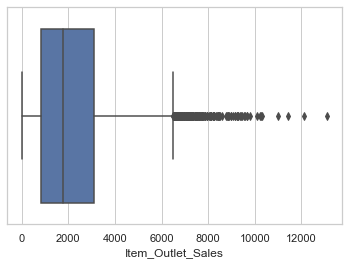

In [91]:
# creating a box plot fro the outliers:

sns.set(style = "whitegrid")
ax = sns.boxplot(x=df["Item_Outlet_Sales"])

as we know only Item_Outlet_Sales have outliers  we can fix them but fixing them will increase our RMSE score to a large extent. 

## Plotting Graph for more Analysis:

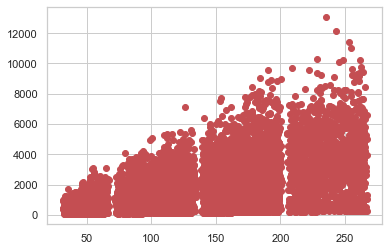

In [92]:
# let's check first with numerical values: 
# creating scatter plot for the "Item_MRP" with "Item_Outlet_Sales"

plt.scatter(df.Item_MRP, df.Item_Outlet_Sales, c='r')
plt.show()

as we checked through out the scatter plot, Value of the Sales increases for the increase in MRP of the item.

In [93]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combine,years_old
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.017834,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non_edible,0.009780,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non_consumable,26


Now, let's go with categorical values: 
which are available in "Item_Type_Combine","Outlet_Location_Type", "Outlet_Type", "Outlet_Size", "Item_Fat_Content" with "Item_Outlet_Sales".
we will use histogram plot for the categorical values. for better understanding.


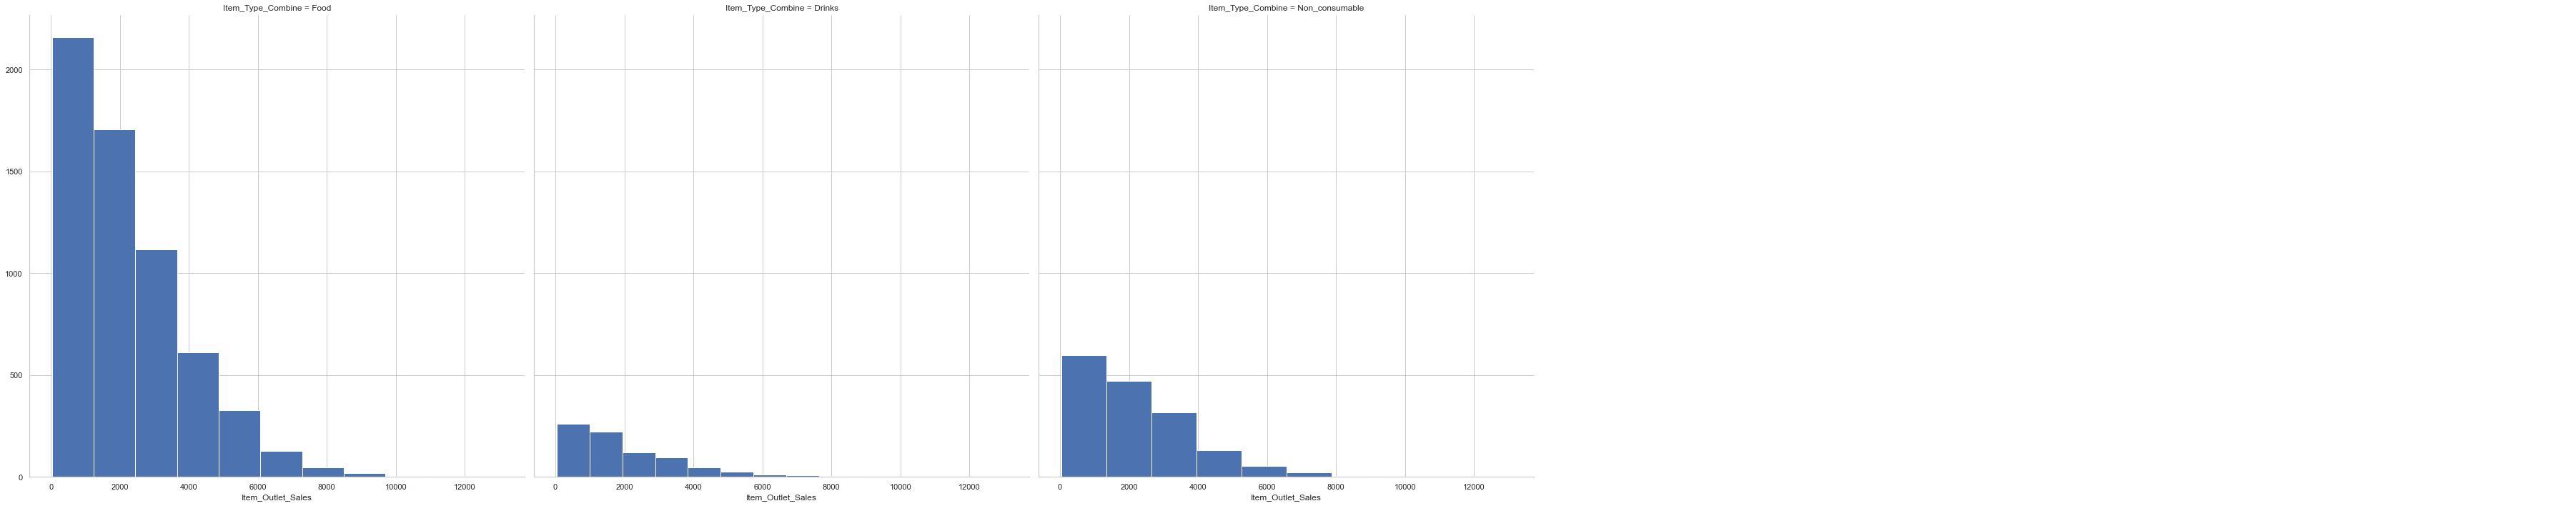

In [94]:
# hist plot for the "Item_Type_Combine" column:

sns.FacetGrid(df, col='Item_Type_Combine', size=10, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();

--> Insights:
Maximum Contribution to outlet sales is from Items that are food type and least is from drinks. 


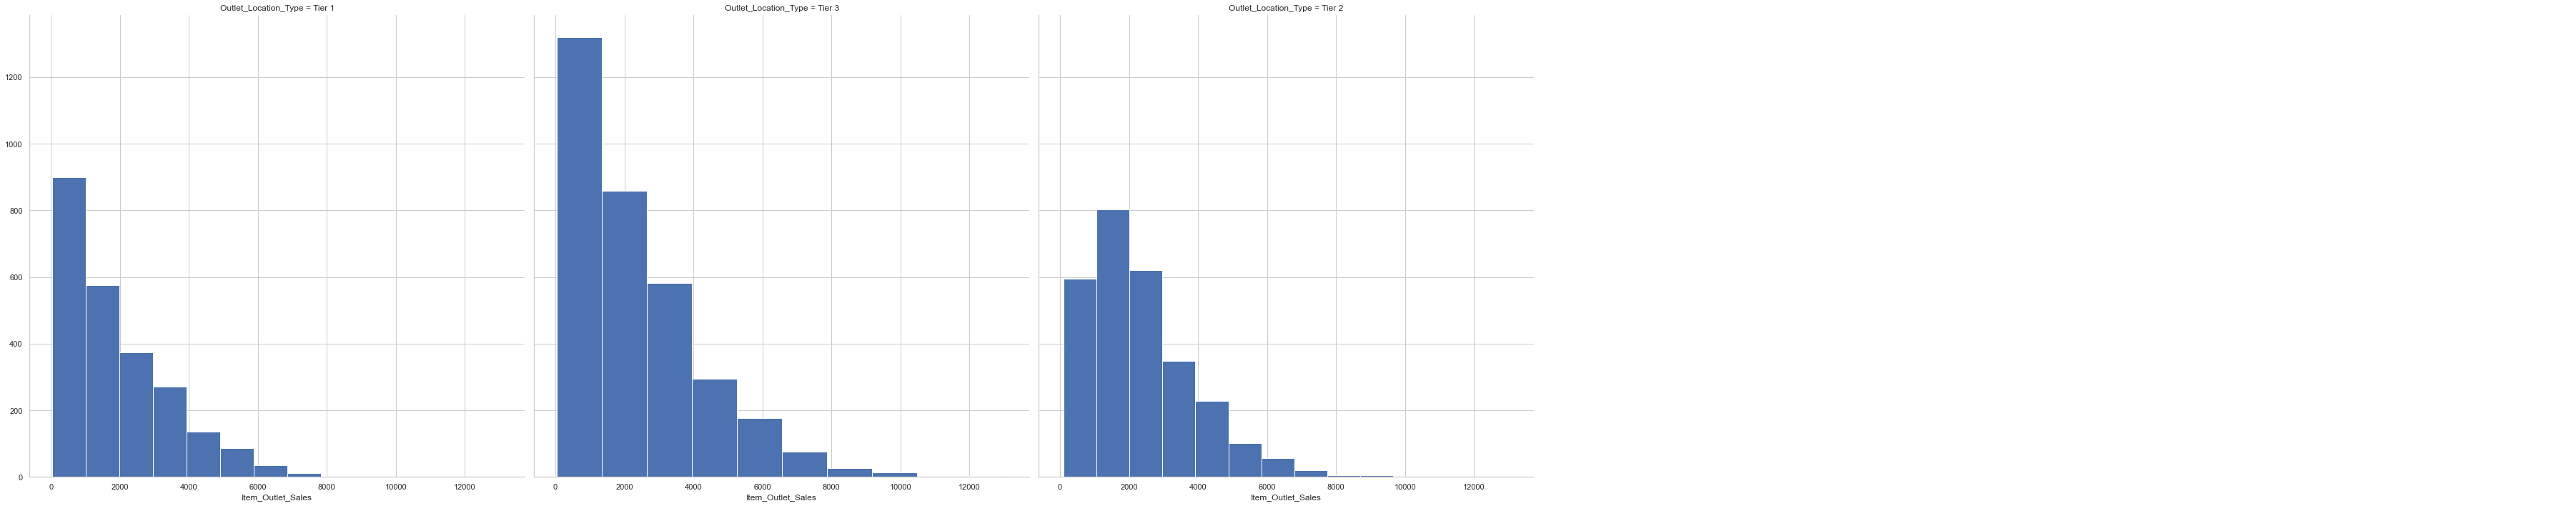

In [95]:
# hist plot for the 'Outlet_Location_Type' column:

sns.FacetGrid(df, col='Outlet_Location_Type', size=10, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();

--> Insights:
    tier3 type of outlet location provides for the maximum sales and other two provides the least sales.

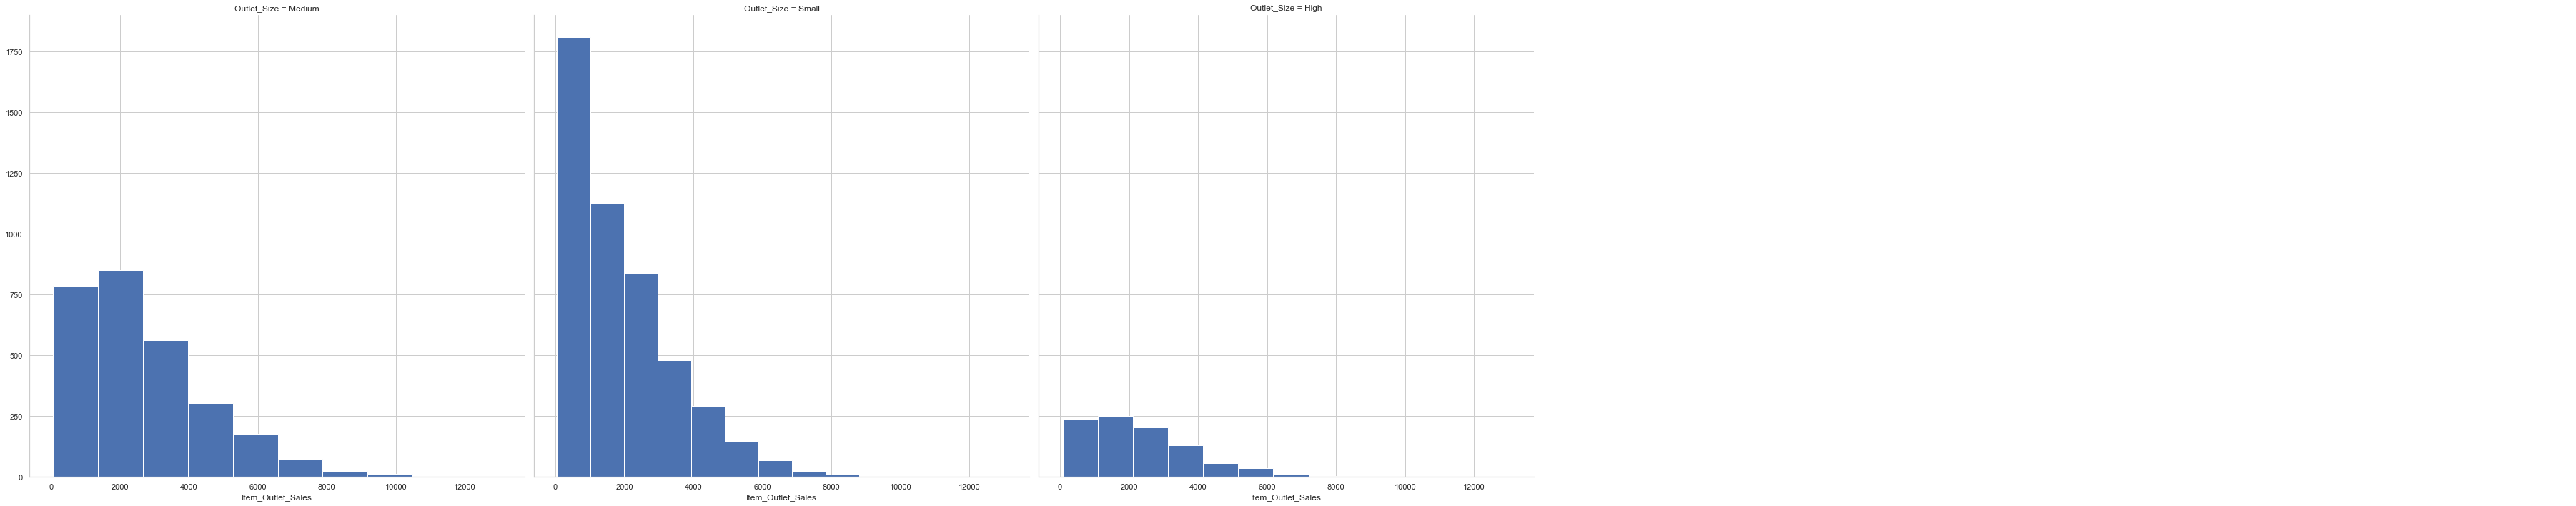

In [96]:
# hist plot for the 'Outlet_Size' column:
sns.FacetGrid(df, col='Outlet_Size', size = 10, col_wrap=5) \
.map(plt.hist, 'Item_Outlet_Sales') \
.add_legend();

small size Outler are providing the maximum sales wheeas large sized outlets are contributting the least.


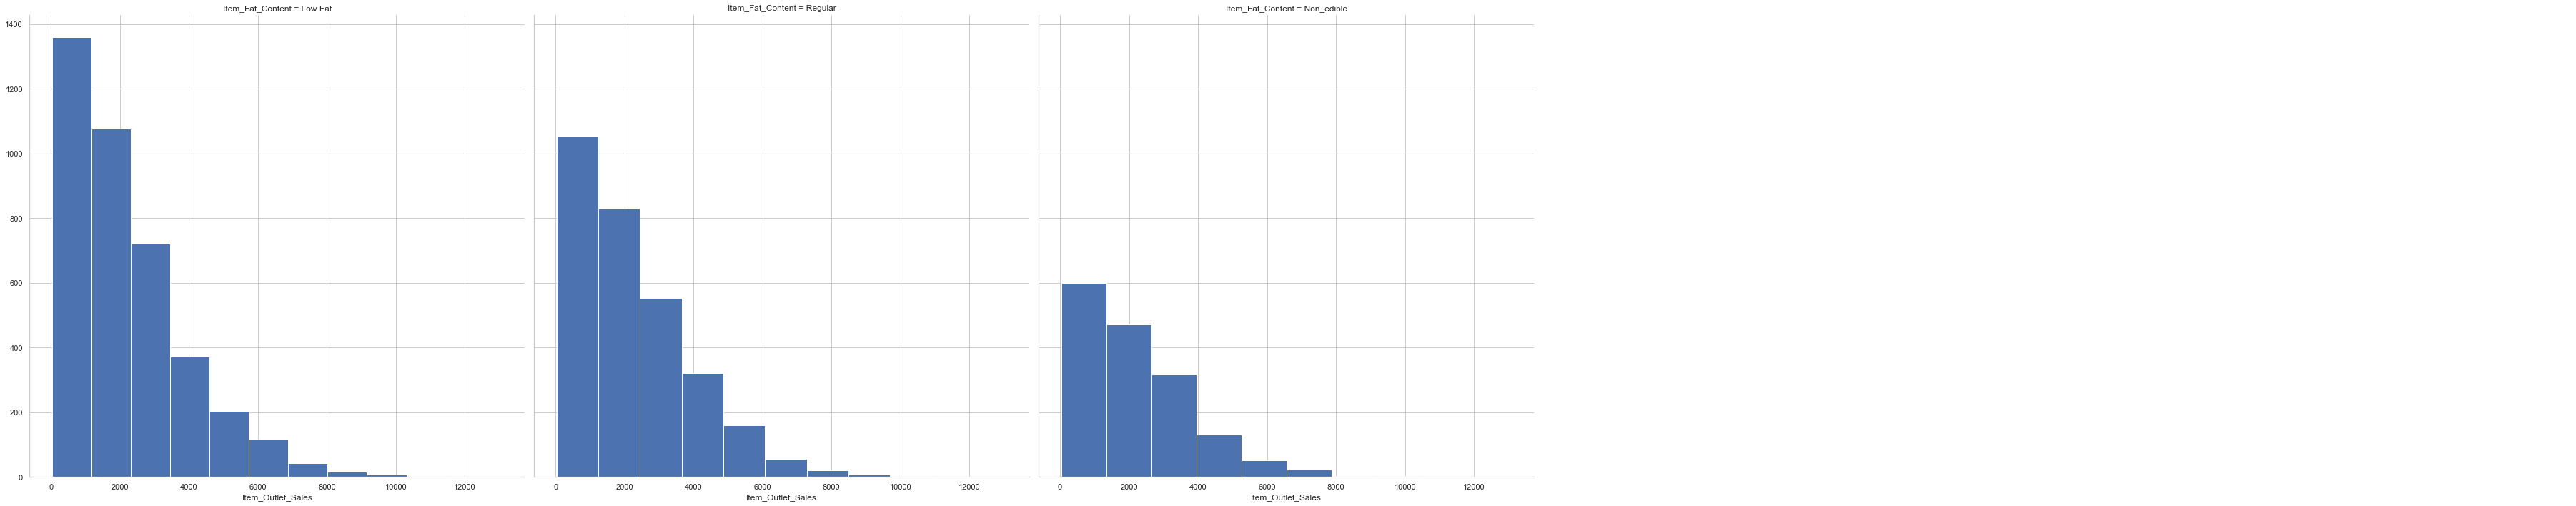

In [97]:
# hist plot for the 'Item_Fat_Content' column:

sns.FacetGrid(df, col='Item_Fat_Content', size=10, col_wrap=5) \
.map(plt.hist, 'Item_Outlet_Sales') \
.add_legend();

 People are prefering items with lowest fat content the most.

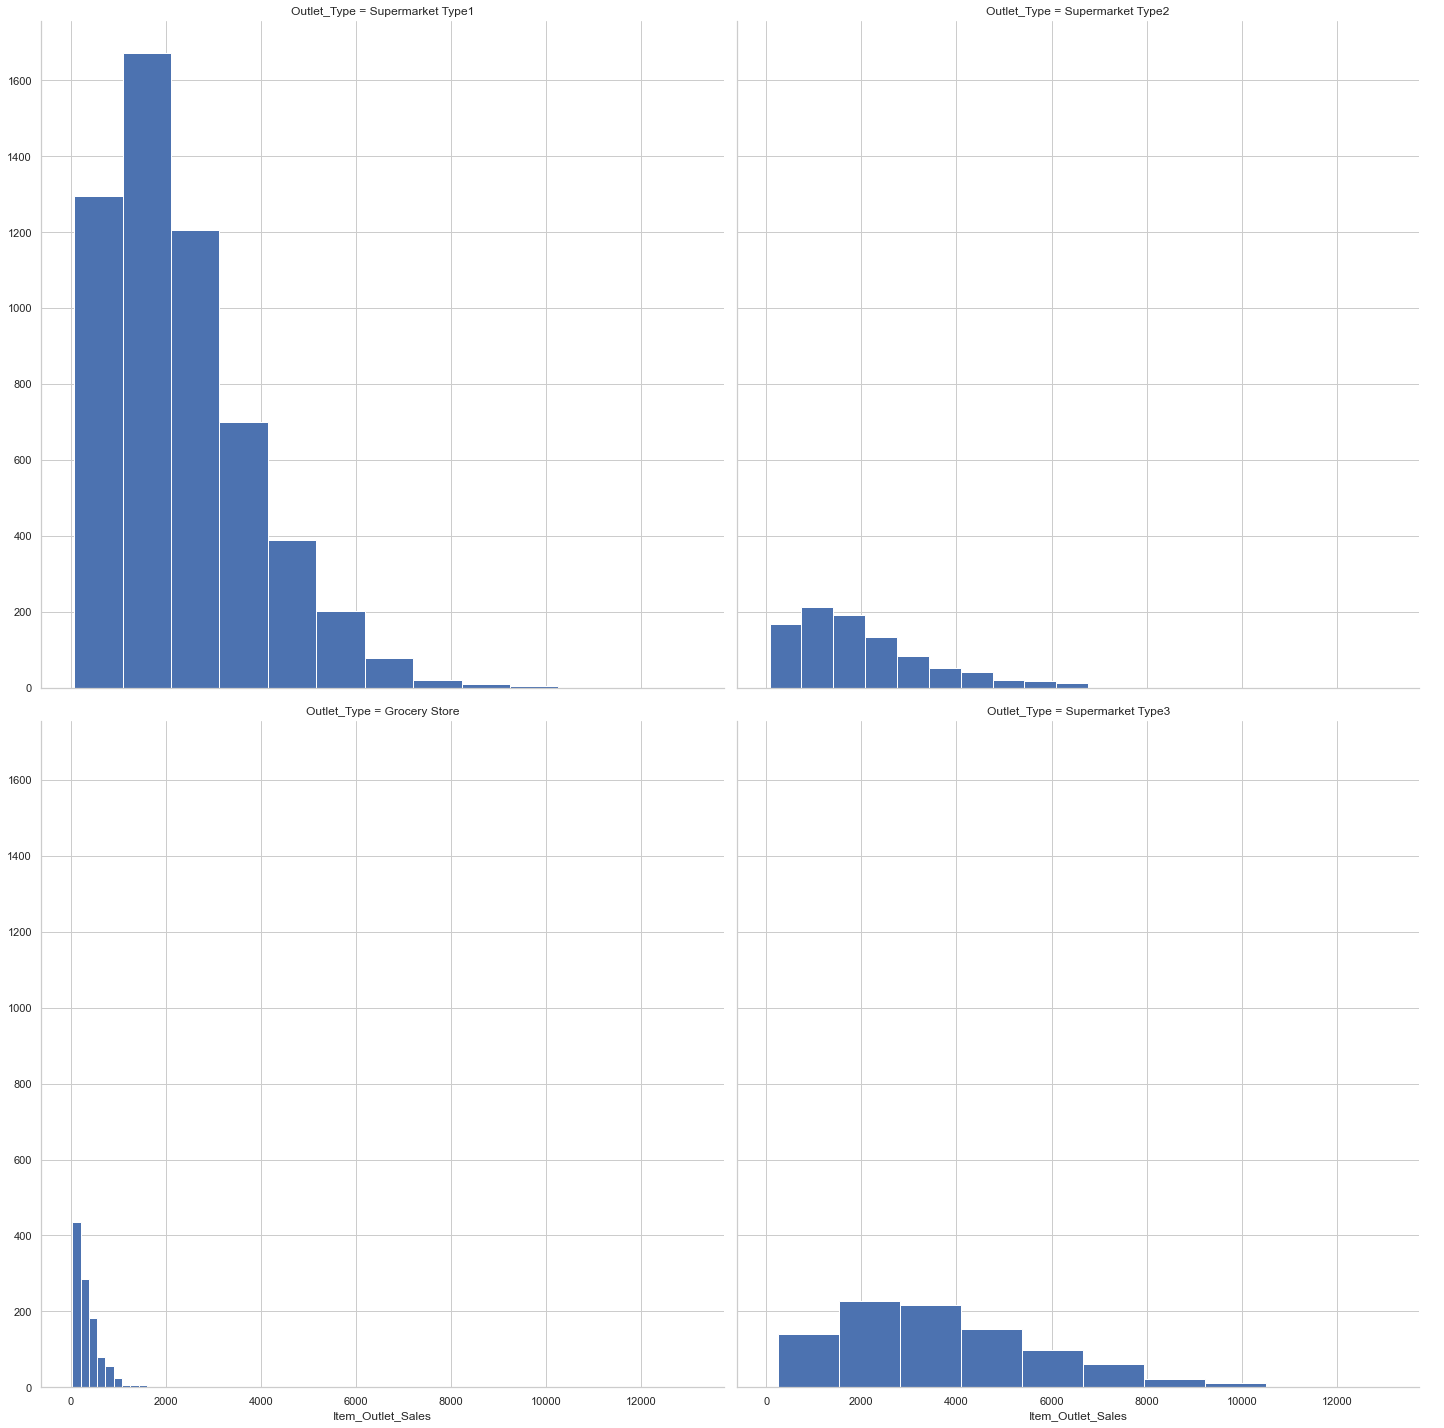

In [98]:
# hist plot for the 'Outlet_Type' column:

sns.FacetGrid(df, col='Outlet_Type', size=10, col_wrap=2) \
.map(plt.hist, 'Item_Outlet_Sales') \
.add_legend();

Maximum of the high sales margin is from Supermarket Type1 Grocery Store has the least sales.

## Label Encoding:

Label Encoding for all the columns with text entries and we will drop "Item_identifier" column.

In [99]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combine,years_old
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14


In [100]:
le = LabelEncoder()
list = ["Item_Fat_Content", "Outlet_Size", "Outlet_Location_Type",
        "Outlet_Type", "Item_Type_Combine"]

for i in list:
    le.fit(df[i])
    df[i] = le.transform(df[i])
df_new = df.drop(columns="Item_Identifier") # frequency encoding.
df_new = pd.get_dummies(df_new, columns = ["Outlet_Identifier"])
df_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combine,years_old,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0,0.016047,249.8092,1,0,1,3735.1380,1,14,0,0,0,0,0,0,0,0,0,1
1,5.92,2,0.019278,48.2692,1,2,2,443.4228,0,4,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016760,141.6180,1,0,1,2097.2700,1,14,0,0,0,0,0,0,0,0,0,1
3,19.20,2,0.017834,182.0950,2,2,0,732.3800,1,15,1,0,0,0,0,0,0,0,0,0
4,8.93,1,0.009780,53.8614,0,2,1,994.7052,2,26,0,1,0,0,0,0,0,0,0,0


In [101]:
# def label_encoding():
# def one_hot_encoding():

In [102]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combine,years_old
Item_Weight,1.000000,-0.010897,-0.022028,0.035751,-0.000512,-0.001719,0.001913,0.013261,0.068781,-0.000247
Item_Fat_Content,-0.010897,1.000000,0.018705,-0.000289,0.000500,0.001068,-0.000801,0.015249,0.187207,0.000231
Item_Visibility,-0.022028,0.018705,1.000000,-0.007550,0.090900,-0.020753,-0.169896,-0.128453,-0.057326,0.084481
Item_MRP,0.035751,-0.000289,-0.007550,1.000000,-0.001052,0.000838,0.000136,0.567574,0.030219,-0.000141
Outlet_Size,-0.000512,0.000500,0.090900,-0.001052,1.000000,-0.480055,-0.401405,-0.162753,0.001583,-0.425568
Outlet_Location_Type,-0.001719,0.001068,-0.020753,0.000838,-0.480055,1.000000,0.467251,0.089367,-0.002572,0.089328
Outlet_Type,0.001913,-0.000801,-0.169896,0.000136,-0.401405,0.467251,1.000000,0.401522,-0.001956,0.122519
Item_Outlet_Sales,0.013261,0.015249,-0.128453,0.567574,-0.162753,0.089367,0.401522,1.000000,0.011236,0.049135
Item_Type_Combine,0.068781,0.187207,-0.057326,0.030219,0.001583,-0.002572,-0.001956,0.011236,1.000000,0.002226
years_old,-0.000247,0.000231,0.084481,-0.000141,-0.425568,0.089328,0.122519,0.049135,0.002226,1.000000


<AxesSubplot:>

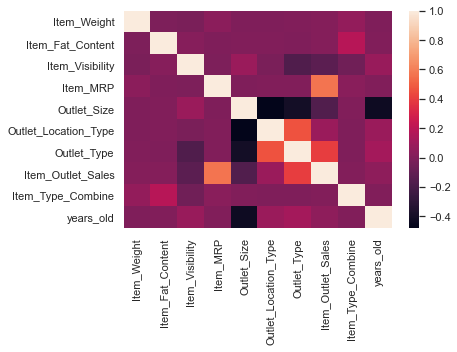

In [103]:
sns.heatmap(df.corr())

In [104]:
df_new.iloc[:8523, :]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combine,years_old,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,0,0.016047,249.8092,1,0,1,3735.1380,1,14,0,0,0,0,0,0,0,0,0,1
1,5.920,2,0.019278,48.2692,1,2,2,443.4228,0,4,0,0,0,1,0,0,0,0,0,0
2,17.500,0,0.016760,141.6180,1,0,1,2097.2700,1,14,0,0,0,0,0,0,0,0,0,1
3,19.200,2,0.017834,182.0950,2,2,0,732.3800,1,15,1,0,0,0,0,0,0,0,0,0
4,8.930,1,0.009780,53.8614,0,2,1,994.7052,2,26,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,0,2,1,2778.3834,1,26,0,1,0,0,0,0,0,0,0,0
8519,8.380,2,0.046982,108.1570,2,1,1,549.2850,1,11,0,0,0,0,0,0,0,1,0,0
8520,10.600,1,0.035186,85.1224,2,1,1,1193.1136,2,9,0,0,0,0,0,0,1,0,0,0
8521,7.210,2,0.145221,103.1332,1,2,2,1845.5976,1,4,0,0,0,1,0,0,0,0,0,0


In [105]:
# Test & Train:
# Seprating trst & train dataset at the "80-20%" ratio.

df_new_train = df_new.iloc[:8523, :]
df_new_test = df_new.iloc[8523:, :]

df_new_test = df_new_test.drop(columns=['Item_Outlet_Sales'])

In [115]:
Y_train = df_new_train['Item_Outlet_Sales']
df_train_test = df_new_train.drop(columns=['Item_Outlet_Sales'])

In [116]:
df_train_test.shape

(8523, 19)

In [117]:
df_train_test.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Type_Combine', 'years_old', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049'],
      dtype='object')

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor 
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import QuantileRegressor


from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ImportError: cannot import name 'QuantileRegressor' from 'sklearn.linear_model' (C:\Users\amita\anaconda3\lib\site-packages\sklearn\linear_model\__init__.py)

In [182]:
models = [('lr',LinearRegression()),
          ('sgd',SGDRegressor()),
          ('lasso',Lasso()),
          ('ridge',Ridge()),
          ('en',ElasticNet()),
          ('huber',HuberRegressor()),
          ('ransac',RANSACRegressor()),
          ('theilSen',TheilSenRegressor())
         ]

In [159]:
pip install scikit_learn

Note: you may need to restart the kernel to use updated packages.


In [160]:
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn import dataset
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import metrics



In [161]:
# import sklearn
# sklearn.metrics.get_scorer_names()
# # sklearn.model_selection.cross_val_validate()

In [183]:
# making function for making beats 2 models for further hyperparameter tuning

def basic_model_selection(x, y, cross_folds, model):
    scores = []
    names = []
    for i, j in model:
        cv_scores = cross_val_score(j, x, y, cv=cross_folds, n_jobs=5)
        scores.append(cv_scores)
        names.append(i)
    for k in range(len(scores)):
        print(names[k], scores[k].mean())

In [184]:
basic_model_selection(df_train_test, Y_train, 4, models)

lr 0.5600167514366816
sgd -3.1848197101970586e+18
lasso 0.5600380234974154
ridge 0.5600211200777783
en 0.4778293365405345
huber 0.5543355862991737
ransac 0.44055417904417127
theilSen 0.5505709600491325


In [186]:
# MSE Score:
basic_model_selection(df_train_test, Y_train, 4, models)

lr 0.5600167514366816
sgd -5.195897016351614e+18
lasso 0.5600380234974154
ridge 0.5600211200777783
en 0.4778293365405345
huber 0.5543355862991737
ransac 0.41924234879497235
theilSen 0.5508189772944967


In [187]:
# R2 Score:
basic_model_selection(df_train_test, Y_tarin, 4, models)

lr 0.5600167514366816
sgd -8.206741530903139e+18
lasso 0.5600380234974154
ridge 0.5600211200777783
en 0.4778293365405345
huber 0.5543355862991737
ransac 0.4045765695210841
theilSen 0.5508978550480236


## Standardization of the model before training

In [188]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

standardized = scaler.fit_transform(df_train_test)
column_names = df_train_test.columns
df_standardized = pd.DataFrame(data=standardized, columns=column_names)
df_standardized.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combine,years_old,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,-0.769246,-0.997813,-1.081039,1.747454,-0.664080,-1.369334,-0.252658,-0.179795,-0.139541,-0.263920,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,2.857362
1,-1.496813,1.236942,-1.016230,-1.489023,-0.664080,1.091569,1.002972,-2.095286,-1.334103,-0.263920,-0.350395,-0.349128,2.860816,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973
2,0.995858,-0.997813,-1.066741,0.010040,-0.664080,-1.369334,-0.252658,-0.179795,-0.139541,-0.263920,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,2.857362
3,1.361794,1.236942,-1.045193,0.660050,0.799954,1.091569,-1.508289,-0.179795,-0.020085,3.789031,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973
4,-0.848890,0.119565,-1.206757,-1.399220,-2.128115,1.091569,-0.252658,1.735696,1.293934,-0.263920,2.853918,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973


In [189]:
basic_model_selection(df_standardized, Y_tarin, 4, models)

lr 0.5599292769992263
sgd 0.5592965160706611
lasso 0.5600954106586715
ridge 0.5600174793091026
en 0.5116678074172953
huber 0.5540855379256
ransac 0.4804567155594266
theilSen 0.5248701580971805


## Robust Scaler:

#### My dataset having outliers make itr more prone to mistakes:

* Robust Scaler handles the Outliers as well.
* It Scales according to the quartile range.

In [190]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

normalize = MinMaxScaler()
robust = RobustScaler(quantile_range = (0.1, 0.8)) # range of interquartile is pne of the paarmeters.

robust_stan = robust.fit_transform(df_train_test)
robust_stan_normalize = normalize.fit_transform(robust_stan)

# also normalized the dataset using MinMaxScaler i.e has bought the dataset between (0,1)
df_robust_normalize = pd.DataFrame(robust_stan_normalize, columns = column_names)
df_robust_normalize.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combine,years_old,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0.282525,0.0,0.038399,0.927507,0.5,0.0,0.333333,0.5,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.081274,1.0,0.048346,0.072068,0.5,1.0,0.666667,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.770765,0.0,0.040593,0.468288,0.5,0.0,0.333333,0.5,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.871986,1.0,0.043901,0.640093,1.0,1.0,0.000000,0.5,0.458333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260494,0.5,0.019104,0.095805,0.0,1.0,0.333333,1.0,0.916667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
basic_model_selection(df_robust_normalize, Y_tarin, 4, models)

lr 0.5599088705109916
sgd 0.560308021885651
lasso 0.5602359565219659
ridge 0.5600244473901529
en 0.16451783452458144
huber 0.5540659349000892
ransac 0.47650496992439
theilSen 0.5461586812146337


## Best Model:

#### Comparing all models using RMSE Score:

In [192]:
robust_test = robust.fit_transform(df_new_test)
robust_normalize_test = normalize.fit_transform(robust_test)
df_test_robust_normalize = pd.DataFrame(robust_normalize_test, columns = column_names )

In [193]:
# Defining final model that I will use for Prediction.

model = LinearRegression()

In [194]:
model.fit(df_robust_normalize, Y_train)

LinearRegression()

In [195]:
# Metrics Calculation:

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import math

def root_mean_squared_error(y, y_pred):
    mse = np.square(np.subtract(y, y_pred)).mean()
    rmse = math.sqrt(mse)
    return rmse

In [196]:
model.intercept_, model.coef_

(4.0373353168038216e+16,
 array([-1.34468208e+01,  4.42068441e+01, -1.19429766e+02,  3.66271460e+03,
        -3.40776849e+16, -3.13230962e+16,  2.25689162e+16, -6.04665752e+01,
        -2.50864161e+16,  3.65253686e+16,  6.42265245e+15,  3.93344242e+15,
        -7.05735863e+15,  1.87907478e+16,  1.05060854e+16,  7.06924444e+15,
         9.15977911e+15, -1.27543231e+15, -2.04048094e+16]))

In [197]:
print("MAE Score for model is : ", mean_absolute_error(Y_train, model.predict(df_robust_normalize)))
print("MSE Score for model is : ", mean_squared_error(Y_train, model.predict(df_robust_normalize)))
print("RMSE Score for model is : ", root_mean_squared_error(Y_train, model.predict(df_robust_normalize)))
print("R2 Score for model is : ", r2_score(Y_train, model.predict(df_robust_normalize)))


MAE Score for model is :  836.5465699870937
MSE Score for model is :  1271653.929223419
RMSE Score for model is :  1127.6763406329944
R2 Score for model is :  0.5632755501159085


In [198]:
final_prediction = model.predict(df_test_robust_normalize) # Predicting the outlet sales.

In [199]:
# The prediction is in the form of numpy array
# Converting into Dataframe.

df_final_prediction = pd.DataFrame(final_prediction, columns = ['Item_Outlet_Sales'])

In [200]:
df_final_prediction.head()

,Item_Outlet_Sales
0,1816.0
1,1568.0
2,1928.0
3,2584.0
4,5192.0


## Saving the final model using Joblib:

In [201]:
import joblib
filename = 'linear_regreassion.sav'  # Name of the model
joblib.dump(model, filename)   # it is saved in your current working directory. 

['linear_regreassion.sav']

In [202]:
# This command loads the model once again.

load_model = joblib.load(filename)

In [203]:
float_formatter = "{:.2f}".format

In [204]:
load_model.predict(np.array(df_robust_normalize.iloc[1, :]).reshape(1, -1))

array([616.])

In [205]:
load_model.predict(np.array(df_robust_normalize.iloc[0:5, :]))

array([4032.,  608., 2344., 1080.,  936.])

In [206]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combine,years_old
0,FDA15,9.30,0,0.016047,249.8092,OUT049,1,0,1,3735.1380,1,14
1,DRC01,5.92,2,0.019278,48.2692,OUT018,1,2,2,443.4228,0,4
2,FDN15,17.50,0,0.016760,141.6180,OUT049,1,0,1,2097.2700,1,14
3,FDX07,19.20,2,0.017834,182.0950,OUT010,2,2,0,732.3800,1,15
4,NCD19,8.93,1,0.009780,53.8614,OUT013,0,2,1,994.7052,2,26


# The Model for Hyperparameter tuning are same Regression Models

In [215]:
# defining function for hyper parameter tuning and using RMSE as my metrics.


def model_parameter_tuning(x, y, model, parameters, cross_folds):
    model_grid = GridSearchCV(model,
                             parameters,
                             cv = cross_folds,
                             n_jobs = 5,
                             verbose=True)
    model_grid.fit(x,y)
    y_predicted = model_grid.predict(x)
    print(model_grid.score)
    print(model_grid.best_params_)
    print("The RMSE Score is : ", np.sqrt(np.mean((y - y_predicted)**2)))
    
model_parameter_tuning(df_standardized, Y_tarin, model,model_parameters, 4)

NameError: name 'parameters' is not defined